In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf


In [35]:
volatility_df = pd.read_csv('../../data/03_processed/volatility_gas_ASTM.csv')

In [36]:
volatility_df['DateSampled'] = pd.to_datetime(volatility_df.DateSampled).apply(lambda x: x.date())
volatility_df = volatility_df.set_index(volatility_df.DateSampled)
#volatility_df.index.asfreq(freq='d')
print(type(volatility_df.index))
volatility_df.head(20)

<class 'pandas.core.indexes.base.Index'>


,Unnamed: 0,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,...,TN_retailers_seasons,TN_distributor_seasons,vapor_liquid_minC_retail,distillation_50_minC _retail,distillation_50_maxC_retail,vapor_pressure_maxC_retail,vapor_liquid_minC_dist,distillation_50_minC_dist,distillation_50_maxC_dist,vapor_pressure_maxC_dist
DateSampled,,,,,,,,,,,,,,,,,,,,,
2015-11-23,0,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-23,1,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-23,2,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,3,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,4,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,5,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor-Liquid Ratio,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,6,61916136,Gasoline,2015-11-24,Mid Grade Unleaded,Tri-star Energy,Twice Daily #8085,"648 Thompson Ln \r\nnashville, Tn 37204",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,7,61916136,Gasoline,2015-11-24,Mid Grade Unleaded,Tri-star Energy,Twice Daily #8085,"648 Thompson Ln \r\nnashville, Tn 37204",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,8,61916136,Gasoline,2015-11-24,Mid Grade Unleaded,Tri-star Energy,Twice Daily #8085,"648 Thompson Ln \r\nnashville, Tn 37204",Vapor-Liquid Ratio,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0


In [37]:
volatility_df.columns

Index(['Unnamed: 0', 'Sample', 'Prod', 'DateSampled', 'Grade', 'Supplier',
       'FacilityName', 'SiteAddress', 'Test', 'Units', 'Method', 'Result',
       'MinResult', 'MaxResult', 'Compliance', 'datesampled_month',
       'datesampled_day', 'Date', 'TN_retailers_seasons',
       'TN_distributor_seasons', 'vapor_liquid_minC_retail',
       'distillation_50_minC _retail', 'distillation_50_maxC_retail',
       'vapor_pressure_maxC_retail', 'vapor_liquid_minC_dist',
       'distillation_50_minC_dist', 'distillation_50_maxC_dist',
       'vapor_pressure_maxC_dist'],
      dtype='object')

In [38]:
volatility_results_df = volatility_df[['Test','Result']]
volatility_results_df.head()

,Test,Result
DateSampled,,
2015-11-23,Distillation 50%,73.3
2015-11-23,Vapor Pressure,88.9
2015-11-23,Vapor-Liquid Ratio,44.6
2015-11-24,Distillation 50%,67.4
2015-11-24,Vapor Pressure,92.7


In [39]:
volatility_results_df['Result'] = volatility_results_df.Result.replace('  ', np.nan)
volatility_results_df['Result'] = volatility_results_df.Result.replace(' ', np.nan)
volatility_results_df['Result'] = volatility_results_df.Result.replace('', np.nan)


/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [40]:
volatility_results_df = volatility_results_df.dropna()
volatility_results_df.head()

,Test,Result
DateSampled,,
2015-11-23,Distillation 50%,73.3
2015-11-23,Vapor Pressure,88.9
2015-11-23,Vapor-Liquid Ratio,44.6
2015-11-24,Distillation 50%,67.4
2015-11-24,Vapor Pressure,92.7


In [41]:
volatility_results_df.isna().sum()

Test      0
Result    0
dtype: int64

In [42]:
volatility_results_df['temp'] = volatility_results_df.Result.astype(float)

In [43]:
volatility_results_df.drop('Result', axis=1, inplace=True)
volatility_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62113 entries, 2015-11-23 to 2018-06-20
Data columns (total 2 columns):
Test    62113 non-null object
temp    62113 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [44]:
volatility_results_floats_df = volatility_results_df.dropna()
volatility_results_floats_df.head()

,Test,temp
DateSampled,,
2015-11-23,Distillation 50%,73.3
2015-11-23,Vapor Pressure,88.9
2015-11-23,Vapor-Liquid Ratio,44.6
2015-11-24,Distillation 50%,67.4
2015-11-24,Vapor Pressure,92.7


In [45]:
# Make data frames for each test to compare seasonality with temperature results of test
distillation_50_df = volatility_results_floats_df[volatility_results_floats_df.Test == 'Distillation 50%']
distillation_50_df.rename(columns={"temp": "Result_deg_C"}, inplace =True)
Distillation_50 = distillation_50_df.drop(columns=['Test'])

vapor_liquid_df = volatility_results_floats_df[volatility_results_floats_df.Test == 'Vapor-Liquid Ratio']
vapor_liquid_df.rename(columns={"temp": "Result_deg_C"}, inplace =True)
Vapor_Liquid = vapor_liquid_df.drop(columns=['Test'])

vapor_pressure_df = volatility_results_floats_df[volatility_results_floats_df.Test == 'Vapor Pressure']
vapor_pressure_df.rename(columns={"temp": "Result_deg_C"}, inplace =True)
Vapor_Pressure = vapor_pressure_df.drop(columns=['Test'])

/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [46]:
Distillation_50.head()

,Result_deg_C
DateSampled,
2015-11-23,73.3
2015-11-24,67.4
2015-11-24,69.2
2015-11-24,67.7
2015-12-02,90.5


In [47]:
Distillation_50.sort_index( axis = 1, inplace=True)
Distillation_50 = Distillation_50[Distillation_50.Result_deg_C <= 225]
Distillation_50.head(5)

,Result_deg_C
DateSampled,
2015-11-23,73.3
2015-11-24,67.4
2015-11-24,69.2
2015-11-24,67.7
2015-12-02,90.5


In [48]:
Vapor_Liquid.sort_index( axis = 1, inplace=True)
Vapor_Liquid = Vapor_Liquid[(Vapor_Liquid < 150) & (Vapor_Liquid > 30)]
Vapor_Liquid.head()

,Result_deg_C
DateSampled,
2015-11-23,44.6
2015-11-24,43.0
2015-11-24,42.2
2015-11-24,51.1
2015-12-02,43.5


In [49]:
Vapor_Pressure.sort_index( axis = 1, inplace=True)
Vapor_Pressure = Vapor_Pressure[Vapor_Pressure < 175]
Vapor_Pressure.head()
# High VP is when off season and low VP is when  contamination

,Result_deg_C
DateSampled,
2015-11-23,88.9
2015-11-24,92.7
2015-11-24,94.3
2015-11-24,91.4
2015-12-02,93.0


## do the stationary time check

In [50]:
# Import the check_stationarity function from previous lab
def stationarity_check(TS, title):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Result_deg_C']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(title)
    plt.savefig(f'../../results/Images/{title}.png')
    plt.show(block=False)
    
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None


/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


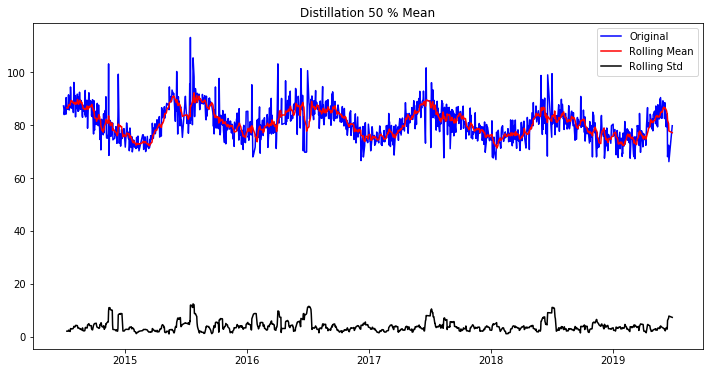

Results of Dickey-Fuller Test:
Test Statistic                   -3.173131
p-value                           0.021594
#Lags Used                       20.000000
Number of Observations Used    1175.000000
Critical Value (1%)              -3.435928
Critical Value (5%)              -2.864003
Critical Value (10%)             -2.568081
dtype: float64


In [51]:
stationarity_check(Distillation_50.groupby('DateSampled').mean(), 'Distillation 50 % Mean')

In [ ]:
stationarity_check(Distillation_50.groupby('DateSampled').min(), 'Distillation 50 % Minimum')

In [ ]:
stationarity_check(Distillation_50.groupby('DateSampled').max(), 'Distillation 50 % Max')

In [ ]:
stationarity_check(Vapor_Liquid.groupby('DateSampled').max(), 'Vapor Liquid Max')
# More max failures in 2019 than in previous years

In [ ]:
stationarity_check(Vapor_Liquid.groupby('DateSampled').min(), 'Vapor Liquid Min')

In [ ]:
stationarity_check(Vapor_Liquid.groupby('DateSampled').mean(), 'Vapor Liquid Mean')

In [ ]:
stationarity_check(Vapor_Pressure.groupby('DateSampled').mean(), 'Vapor Pressure Mean')

In [ ]:
stationarity_check(Vapor_Pressure.groupby('DateSampled').max(), 'Vapor Pressure Max')

In [ ]:
stationarity_check(Vapor_Pressure.groupby('DateSampled').min(), 'Vapor Pressure Min')

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = Distillation_50.plot.kde()
plt.title('Distillation 50% Distribution of Results')
plt.savefig(f'../../results/Images/Distillation_50_Distribution.png')
plt.show()

# Its Probably the divide in the grade that causes the non normal appearance

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = Vapor_Pressure.plot.kde()
plt.title('Vapor Pressure Distribution of Results')
plt.savefig(f'../../results/Images/Vapor_Pressure_Distribution.png')
plt.show()

<Figure size 864x432 with 0 Axes>

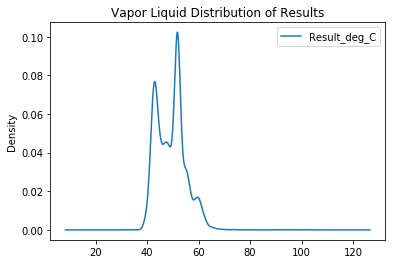

In [67]:
fig = plt.figure(figsize=(12,6))
ax = Vapor_Liquid.plot.kde()
plt.title('Vapor Liquid Distribution of Results')
plt.savefig(f'../../results/Images/Vapor_Liquid_Distribution.png')
plt.show()

In [68]:
dated_vapor = pd.DataFrame(Vapor_Pressure.groupby('DateSampled').max())
dated_vapor.index = pd.to_datetime(dated_vapor.index, format = '%Y/%m/%d')

In [73]:
dated_vapor = dated_vapor.asfreq('d')
#dated_vapor.dropna(inplace=True)

In [74]:
dated_vapor.index

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08',
               '2014-07-09', '2014-07-10',
               ...
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28'],
              dtype='datetime64[ns]', name='DateSampled', length=1824, freq='D')

In [75]:
resampled_vapor_pessure = dated_vapor.resample(rule = 'B')
resampled_vapor_pessure = resampled_vapor_pessure.fillna(method = 'pad')

In [76]:
resampled_vapor_pessure.dropna(inplace=True)

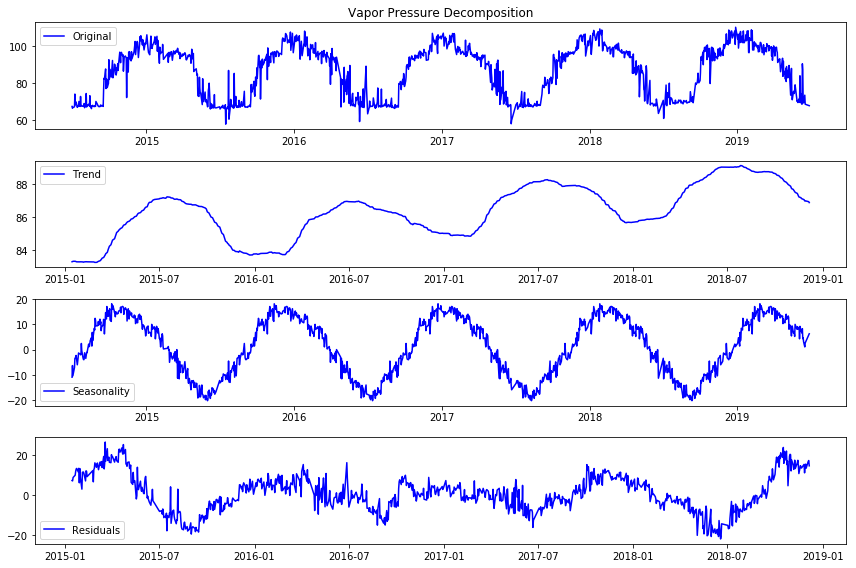

In [82]:
# Gather the trend, seasonality and noise of decomposed object
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(resampled_vapor_pessure, freq = 260)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Vapor Pressure Decomposition')
plt.plot(Vapor_Pressure.groupby('DateSampled').max() , label='Original', color="blue")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')

plt.savefig(f'../../results/Images/seasonal_decomposition.png')
plt.tight_layout()

##### 

In [ ]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Vapor_Pressure.groupby('DateSampled').max(), freq = 1)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Vapor_Pressure.groupby('DateSampled').max() , label='Original', color="blue")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
result = seasonal_decompose(Vapor_Pressure.groupby('DateSampled').max(), model='multiplicative')
result.plot()
pyplot.show()

In [ ]:
Vapor_Pressure.groupby('DateSampled').max().plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vapor Liquid Test Results (Degrees Celsius)', fontsize=14);

data_diff = Vapor_Pressure.groupby('DateSampled').max().diff(periods=150)
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vapor Liquid Test Results (Degrees Celsius)', fontsize=14);

In [ ]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(Vapor_Pressure.groupby('DateSampled').max());

In [ ]:
plot_acf(Vapor_Pressure.groupby('DateSampled').max(), lags = 100);

In [ ]:
plot_pacf(Vapor_Pressure.groupby('DateSampled').max(), lags = 100);